In [113]:
import pandas as pd

In [114]:
import numpy as np

In [115]:
import matplotlib.pyplot as plt

%matplotlib inline

In [116]:
import seaborn as sns

In [117]:
raw_data = pd.read_csv('Bias_correction_ucl - Copy.csv', nrows=5000)
data = raw_data.round(decimals=3)

In [118]:
x = data[['station',  'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']].values
y = data['Present_Tmax'].values

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
model = LinearRegression()

In [123]:
model.fit(x_train, y_train)

LinearRegression()

In [124]:
print(model.coef_)

[-1.03043760e-03  9.10613149e-01 -4.78011339e-02 -3.56298460e-02
 -8.09875958e-02  3.52828670e-01  7.19532010e-02  1.81865699e-02
 -3.84311099e+00  1.96956819e+00  2.82546731e+00  4.37522042e-01
 -9.27266288e-02 -1.61651786e-02 -1.19199008e-01 -1.89654573e-01
  1.07057384e+00  3.54633180e-01 -8.82686232e-04  1.56612246e-01
  2.84543293e-01 -3.20815342e-01]


In [125]:
print(model.intercept_)

-79.71116655722672


In [126]:
pd.DataFrame(model.coef_, columns = ['Coeff'])

,Coeff
0,-0.001030
1,0.910613
2,-0.047801
3,-0.035630
4,-0.080988
5,0.352829
6,0.071953
7,0.018187
8,-3.843111
9,1.969568


In [127]:
predictions = model.predict(x_test)

Text(0, 0.5, 'Predicted')

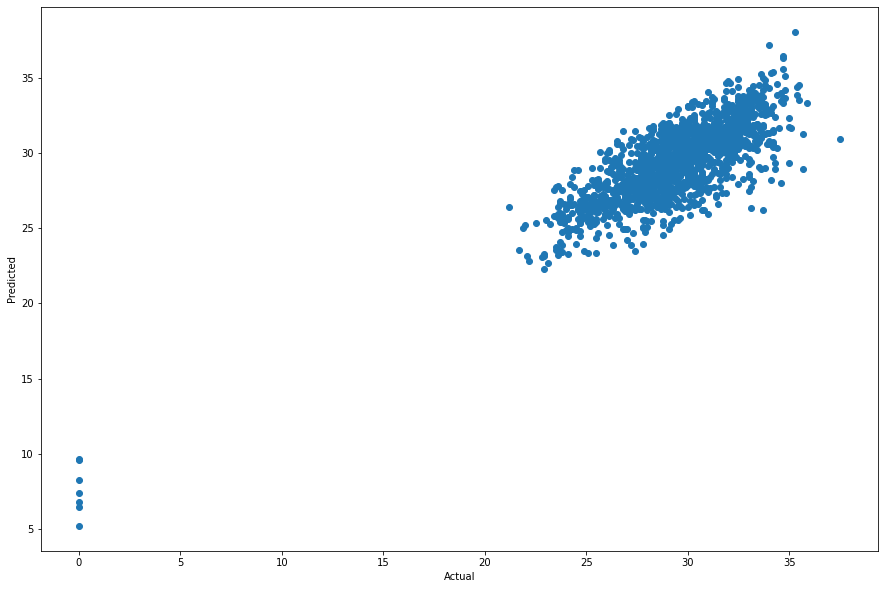

In [128]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')


(array([  3.,   3.,   3.,  72., 336., 577., 354., 119.,  27.,   6.]),
 array([-9.67306295, -7.95611654, -6.23917012, -4.52222371, -2.8052773 ,
        -1.08833089,  0.62861552,  2.34556194,  4.06250835,  5.77945476,
         7.49640117]),
 <BarContainer object of 10 artists>)

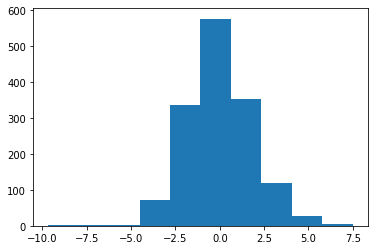

In [129]:
plt.hist(y_test - predictions)

In [130]:
from sklearn import metrics

In [131]:
metrics.mean_absolute_error(y_test, predictions)

1.4525171078990438

In [132]:
metrics.mean_squared_error(y_test, predictions)

3.548720455717835

In [133]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.8838047817430115